# Sarcasm Detection with Bidirectional LSTM

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Data.csv'

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


### Print some of the Headlines along with the target

In [4]:
for i in range(10):
    print(df['headlines'][i],'-',df['target'][i])
    print()

CNN Triumphs (At Least in Most Demographic Categories) - Non Sarcastic

‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office - Sarcastic

New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech - Non Sarcastic

Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris - Non Sarcastic

God Urges Rick Perry Not To Run For President - Sarcastic

Global Aid Pours into Haiti - Non Sarcastic

CNN Anchor Calls Obama Protester 'Rude' And 'Crazy' - Non Sarcastic

Federal Prisons Reinstitute Executions By Lethal Inflation - Sarcastic

Lou Dobbs Crumbles When Pressed On His 'NAFTA Super Highway' Myth - Non Sarcastic

CNN Still Bent On Debating 'Two Sides' Of The Confederacy - Non Sarcastic



### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
freq,1,6531


### Check for missing values

In [7]:
df.isna().sum()

headlines    0
target       0
dtype: int64

### Check for duplicates

In [8]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

<Axes: xlabel='count', ylabel='target'>

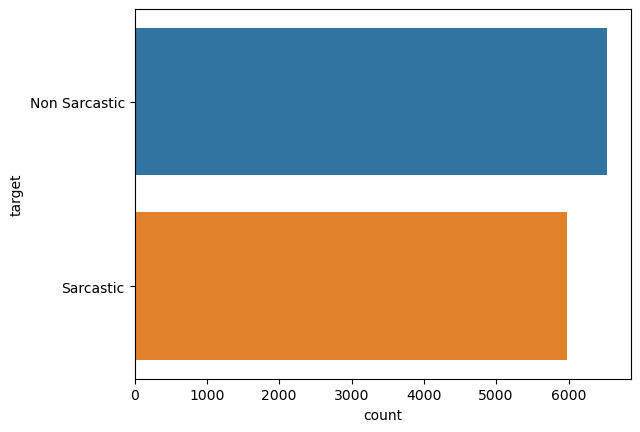

In [9]:
sns.countplot(y=df['target'])


### Create a funciton to preprocess the text

In [12]:
import re
from nltk.stem import WordNetLemmatizer

In [13]:
def preprocess(sentence):
    sentence=sentence.lower()
    text=re.sub(r"[^0-9a-zA-Z]",' ',sentence).split()
    
    lemma=WordNetLemmatizer()
    text=[lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

### Apply the preprocess function to the description

In [14]:
df['headlines']=df['headlines'].apply(preprocess)

In [15]:
for i in range(10):
    print(df['headlines'][i],'-',df['target'][i])
    print()

cnn triumph at least in most demographic category - Non Sarcastic

you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office - Sarcastic

new email reveal warm relationship between kamala harris and big tech - Non Sarcastic

donald trump jr get slammed over racist birtherism bot attack on kamala harris - Non Sarcastic

god urge rick perry not to run for president - Sarcastic

global aid pours into haiti - Non Sarcastic

cnn anchor call obama protester rude and crazy - Non Sarcastic

federal prison reinstitute execution by lethal inflation - Sarcastic

lou dobbs crumbles when pressed on his nafta super highway myth - Non Sarcastic

cnn still bent on debating two side of the confederacy - Non Sarcastic



### Split Input & Target Variables

In [16]:
X=df['headlines']
y=df['target']

### One Hot encode our Target Variable

In [17]:
from sklearn.preprocessing import LabelBinarizer

In [18]:
encoder=LabelBinarizer()

In [19]:
y=encoder.fit_transform(y)

In [20]:
encoder.classes_

array(['Non Sarcastic', 'Sarcastic'], dtype='<U13')

### Split the dataset into Training & Testing Set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Create a keras Tokenizer object

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
tokenizer=Tokenizer(num_words=500)

### fit on text for our X

In [26]:
tokenizer.fit_on_texts(X)

In [27]:
vocab_size=len(tokenizer.word_index)+1

In [28]:
vocab_size

15411

### Create a function to convert text to numerical representation and add padding

In [29]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    padded_sequence=pad_sequences(encoded_docs,maxlen=128)
    
    return padded_sequence

### Apply the function to our X_train & X_test

In [30]:
X_train=text_encoding(X_train)
X_test=text_encoding(X_test)

In [31]:
X_test

array([[  0,   0,   0, ..., 436, 439,   5],
       [  0,   0,   0, ...,   1,   9, 299],
       [  0,   0,   0, ...,   5,  39,   3],
       ...,
       [  0,   0,   0, ...,  42,   3,  29],
       [  0,   0,   0, ..., 152,   2, 109],
       [  0,   0,   0, ...,  14,  83,  96]])

### Create keras Sequential model with GRU Layers

In [32]:
from tensorflow.keras import Sequential,layers

In [33]:
model=Sequential()

In [34]:
model.add(layers.Embedding(vocab_size,128))

model.add(layers.Bidirectional(layers.LSTM(128,return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1972608   
                                                                 
 bidirectional (Bidirection  (None, None, 256)         263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

### Compile the model

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the model with our Training Set

In [37]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
297/297 [==============================] - 141s 459ms/step - loss: 0.4136 - accuracy: 0.8064 - val_loss: 0.2929 - val_accuracy: 0.8822
Epoch 2/10
297/297 [==============================] - 195s 656ms/step - loss: 0.2922 - accuracy: 0.8767 - val_loss: 0.2724 - val_accuracy: 0.8802
Epoch 3/10
297/297 [==============================] - 200s 672ms/step - loss: 0.2702 - accuracy: 0.8841 - val_loss: 0.2652 - val_accuracy: 0.8862
Epoch 4/10
297/297 [==============================] - 196s 661ms/step - loss: 0.2580 - accuracy: 0.8874 - val_loss: 0.2572 - val_accuracy: 0.8802
Epoch 5/10
297/297 [==============================] - 195s 658ms/step - loss: 0.2442 - accuracy: 0.8959 - val_loss: 0.2734 - val_accuracy: 0.8723
Epoch 6/10
297/297 [==============================] - 196s 660ms/step - loss: 0.2317 - accuracy: 0.9011 - val_loss: 0.2654 - val_accuracy: 0.8862
Epoch 7/10
297/297 [==============================] - 194s 654ms/step - loss: 0.2196 - accuracy: 0.9072 - val_loss: 0.2737 -

### Make predictions with Test set

In [38]:
y_pred=model.predict(X_test)

79/79 [==============================] - 14s 148ms/step


In [39]:
y_pred=[np.argmax(i) for i in y_pred]

### Check accuracy score

In [40]:
from sklearn import metrics

In [41]:
metrics.accuracy_score(y_test,y_pred)

0.5035971223021583

### Confusion matrix

<Axes: >

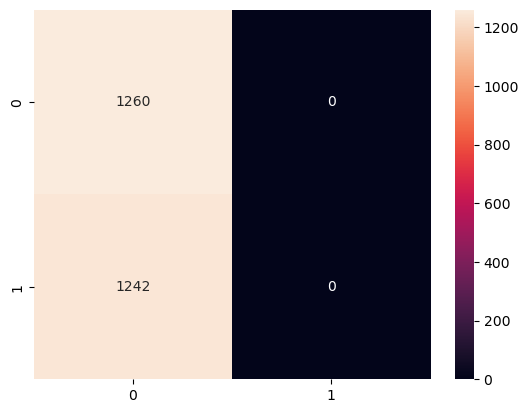

In [42]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Classification Report

In [43]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1260
           1       0.00      0.00      0.00      1242

    accuracy                           0.50      2502
   macro avg       0.25      0.50      0.33      2502
weighted avg       0.25      0.50      0.34      2502



C:\Users\aryav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aryav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aryav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
